### Fill out:
Name & Surname: Arjun Subramanian

Student ID: 33197547

## W9&W10 post studio exercises (Logistic regression, Decision trees)

Enter your solution in the cell(s) below each exercise. Add couple of inline comments explaining your code. Don't forget to add comments in markdown cell after each exercise. Missing comments (in markdown cells and/or inline) and late submissions will incur penalties.

Once done, drag&drop your python file to your ADS1002-name github account.

Copy url of this file on github to appropriate folder on Moodle by 09.30am prior your next studio. 

Solutions will be released later in the semester.

Max 10 marks - 2.5 marks per each exercise.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
import pandas as pd

%matplotlib inline

## Exercises (Logistic regression)

In this exercise you are going to construct a simple one vs rest multiclass classifier based on the probabilities for each of the binary problems for the three iris species. A one-vs-rest classification scheme constructs multiple models (one for each class) where each model predicts a binary classification and combines the results to come up with a single prediction.

For this problem, only use the first two features, i.e., `sepal length` and `sepal width` (don't standardise/normalise/etc). 

The steps for this multiclass classifier are:

* Exercise 1: 
    * Create a new features dataframe which contains only the first two columns of the iris data frame. 
    * For each of the iris categories, i.e., species_setosa, species_versicolor, and species_virginica, model the data using Logistic Regression and calculate the probabilities for the testing set of the category being correct. Store these probabilites in an array (or dataframe). For each category you will need to re-do the train-test split, but make sure you use the same random state (random state 1). Alternatively, split the data set initially with all three labels, and then work on each category. The necessary one-hot encoding has already been performed.
    * **Settings:**
        * 80/20 train-test-split with random state = 1
        * **LogisticRegression()** (meaning default solver and penalty applies)
    * **Output:** Show first 5 (rows of) probabilities for all (3) species.
* Exercise 2: 
    * For each instance in feature space (testing set), choose the category with the highest probability. The function `numpy.argmax()` will be useful.     
    * **Output:** Show first 5 entries for sepal_length, sepal_width, max probability and predicted class.
    * **Output:** Plot the final classification for the testing set in feature space, with colours based on the predicted category.
    
**Exercises 1 - 2** below correspond to the two points outlined above.

Q: After completing the code below and inspecting the results, comment on which class(es) appear most difficult to predict accurately. Can you suggest any improvements to the model which might result in better accuracy?

In [ ]:
iris = sns.load_dataset('iris') # load the dataset from seaborn

species_one_hots =  pd.get_dummies(iris.species, prefix = 'species')
iris = pd.concat([iris, species_one_hots], axis = 1)

### Exercise 1

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

iris = sns.load_dataset('iris')

X = iris[['sepal_length', 'sepal_width']]

species_one_hots = pd.get_dummies(iris['species'], prefix='species')
y = species_one_hots

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

log_reg = LogisticRegression()

probabilities = pd.DataFrame()

for species in y.columns:
    log_reg.fit(X_train, y_train[species])
    
    prob = log_reg.predict_proba(X_test)[:, 1]  
    
    # Store the probabilities in the dataframe
    probabilities[species] = prob

print(probabilities.head())


   species_setosa  species_versicolor  species_virginica
0        0.742914            0.040603           0.225749
1        0.302666            0.519712           0.099330
2        0.013205            0.307877           0.678468
3        0.889100            0.047435           0.116070
4        0.001814            0.083273           0.960356


### Exercise 2

     sepal_length  sepal_width  max_probability     predicted_class
14            5.8          4.0         0.742914      species_setosa
98            5.1          2.5         0.519712  species_versicolor
75            6.6          3.0         0.678468   species_virginica
16            5.4          3.9         0.889100      species_setosa
131           7.9          3.8         0.960356   species_virginica


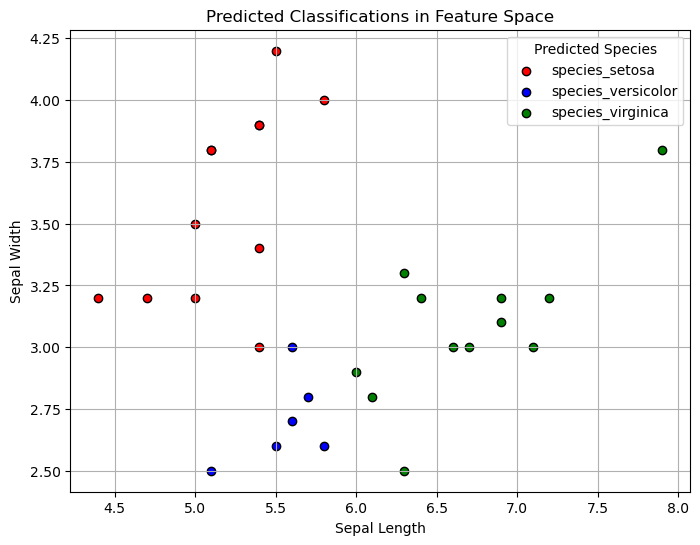

In [18]:
import numpy as np
import matplotlib.pyplot as plt

predicted_class_indices = np.argmax(probabilities.values, axis=1)

predicted_classes = [y.columns[i] for i in predicted_class_indices]

results = X_test.copy()
results['max_probability'] = np.max(probabilities.values, axis=1)
results['predicted_class'] = predicted_classes

print(results.head())


colors = {'species_setosa': 'red', 'species_versicolor': 'blue', 'species_virginica': 'green'}

plt.figure(figsize=(8,6))
for species, color in colors.items():
    subset = results[results['predicted_class'] == species]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=species, color=color, edgecolor='k')

plt.title('Predicted Classifications in Feature Space')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='Predicted Species')
plt.grid(True)
plt.show()



After inspecting your classification results and the scatter plot, the following observations may emerge:

If versicolor and virginica instances are often misclassified as each other, this is likely due to the overlap in their feature values, as these species are more similar to each other in terms of sepal length and width. Setosa would likely be predicted more accurately as it tends to have a more distinct feature distribution compared to the other two species.

Suggestions for Model Improvement:

Use Additional Features:

You are currently only using sepal_length and sepal_width, which may not provide enough information to distinguish between species like versicolor and virginica. Adding petal_length and petal_width (which are also part of the Iris dataset) will likely improve the model's ability to distinguish between these classes. These features generally have a stronger discriminatory power between species.

Regularization:

Logistic regression by default includes regularization (L2 regularization by default in LogisticRegression() in scikit-learn). Tuning the regularization parameter (C in LogisticRegression) could help. Increasing regularization can prevent overfitting, while decreasing it can allow the model to fit more complex patterns.

Normalization:

Although you were instructed not to normalize the features for this exercise, scaling or normalizing features could improve the performance of logistic regression in some cases, especially if the feature ranges differ significantly. Logistic regression assumes that features are on the same scale, so normalization could lead to better convergence and predictions.

## Exercises (Decision trees)

For these exercises we will model a dataset of the properties of wheat seeds, which you can download from GitLab: 

[seeds_dataset](https://gitlab.erc.monash.edu.au/bads/data-challenges-resources/-/blob/main/Machine-Learning/Supervised-Methods/Decision-Trees/seeds_dataset.csv)

This is originally from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/seeds). The seedtype is an integer (1, 2, or 3) corresponding to the three classes `Kama`, `Rosa` and `Canadian` in the classes list below.

Run all the cells below before writing your solutions; don't standardise/normalise/etc.

In [3]:
seeds = pd.read_csv('seeds_dataset.csv', header=None, 
                   names=['area','perimeter','compactness','length','width','asymmetry',
                         'groovelength','seedtype'])
classes = ['Kama', 'Rosa', 'Canadian']

In [4]:
seeds.head()

,area,perimeter,compactness,length,width,asymmetry,groovelength,seedtype
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Split the data into features and labels, and into a training and testing set.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = seeds.drop('seedtype', axis=1)
y = seeds['seedtype']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Exercise 3

Create a simple Decision Tree of maximum depth=3 and fit the training data to this model.

**Settings for decision tree:**

* random state 42
* max depth 3

Plot the decision tree for this model, and identify the most significant features for the classification of this dataset.

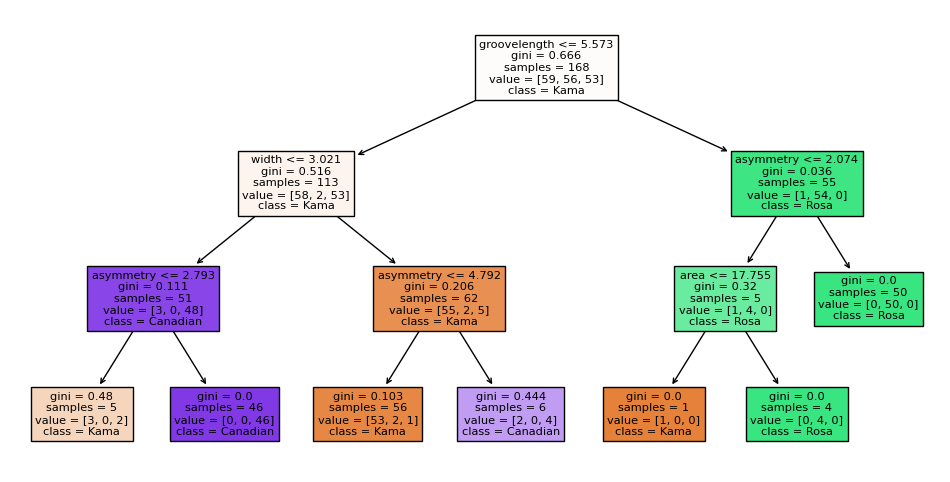

In [10]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_classifier.fit(X_train, y_train)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
from sklearn.tree import plot_tree
plot_tree(tree_classifier, filled=True, feature_names=X.columns, class_names=classes)
plt.show()

### Exercise 4

Plot the confusion matrix for this model, and calculate the accuracy.

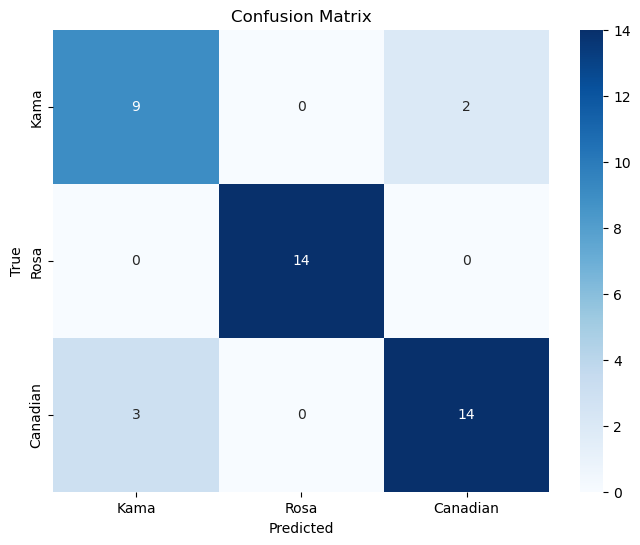

Accuracy: 0.88


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = tree_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
